<a href="https://www.kaggle.com/code/hoshimmardonov1/usage-of-bert-model?scriptVersionId=136845893" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
import pandas as pd

# df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv')

df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', sep=',',  encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[["v1", "v2"]]

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [6]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
747/4825

0.15481865284974095

In [8]:
df_spam = df[df['v1'] == 'spam']
df_spam.shape

(747, 2)

In [9]:
df_ham = df[df['v1'] == 'ham']
df_ham.shape

(4825, 2)

In [10]:
df_ham_new = df_ham.sample(df_spam.shape[0])
df_ham_new.shape

(747, 2)

In [11]:
df_balanced = pd.concat([df_spam, df_ham_new])

In [12]:
df_balanced.shape

(1494, 2)

In [13]:
df_balanced['v1'].value_counts()

spam    747
ham     747
Name: v1, dtype: int64

In [14]:
df_balanced.sample(5)

,v1,v2
2729,spam,Urgent! Please call 09066612661 from your land...
879,spam,U have a Secret Admirer who is looking 2 make ...
760,spam,"Romantic Paris. 2 nights, 2 flights from å£79 ..."
107,ham,How would my ip address test that considering ...
992,ham,Up to Ì_... ÌÏ wan come then come lor... But i...


In [15]:
df_balanced['spam'] = df_balanced['v1'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(10)

,v1,v2,spam
4198,spam,"cmon babe, make me horny, *turn* me on! Txt me...",1
2796,ham,If I get there before you after your ten billi...,0
375,ham,Can you say what happen,0
946,spam,Ur cash-balance is currently 500 pounds - to m...,1
5292,spam,Urgent! Please call 09061213237 from landline....,1
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...,1
1565,ham,"The &lt;#&gt; g that i saw a few days ago, th...",0
234,spam,Text & meet someone sexy today. U can find a d...,1
385,ham,It took Mr owl 3 licks,0
4906,ham,Then anything special?,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['v2'], df_balanced['spam'], stratify=df_balanced['spam'])

In [17]:
X_train.head()

1016    FREE for 1st week! No1 Nokia tone 4 ur mob eve...
3837    Went to pay rent. So i had to go to the bank t...
4179    swhrt how u dey,hope ur ok, tot about u 2day.l...
2437    For ur chance to win å£250 cash every wk TXT: ...
3546    Rock yr chik. Get 100's of filthy films &XXX p...
Name: v2, dtype: object

In [18]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [19]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "Wishing you a wonderful week.",
    "U having lunch alone? I now so bored."
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.919723  , -0.48090896, -0.96616685, ..., -0.7632666 ,
        -0.7748676 ,  0.88422656],
       [-0.95804   , -0.54904234, -0.9218031 , ..., -0.7794256 ,
        -0.72763646,  0.9761867 ]], dtype=float32)>

In [20]:
e = get_sentence_embeding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

In [21]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606917 , -0.14219369,  0.4960467 , ...,  0.4216533 ,
        -0.5322139 ,  0.8031217 ],
       [-0.86023206, -0.2124291 ,  0.4915699 , ...,  0.39798123,
        -0.60506266,  0.84471625],
       [-0.7128865 , -0.15463915,  0.3840174 , ...,  0.35278758,
        -0.5099135 ,  0.7347413 ],
       [-0.82533485, -0.3555058 , -0.5906965 , ..., -0.01613646,
        -0.61417574,  0.8723027 ],
       [-0.750413  , -0.26812565, -0.2668947 , ...,  0.02839549,
        -0.59380937,  0.79749846],
       [-0.7854433 , -0.29949644,  0.4102758 , ...,  0.5222546 ,
        -0.49573514,  0.8150746 ]], dtype=float32)>

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[4]], [e[5]])


array([[0.9164159]], dtype=float32)

In [23]:
# BERT layers

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural networks layers

l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs["pooled_output"])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [25]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name="accuracy"),
      tf.keras.metrics.Precision(name="precision")   ,
      tf.keras.metrics.Recall(name="Recall")
]

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = METRICS
             )

In [26]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 18s 224ms/step - loss: 0.6406 - accuracy: 0.6241 - precision: 0.6230 - Recall: 0.6286
Epoch 2/10
35/35 [==============================] - 8s 220ms/step - loss: 0.5033 - accuracy: 0.8152 - precision: 0.8157 - Recall: 0.8143
Epoch 3/10
35/35 [==============================] - 8s 230ms/step - loss: 0.4201 - accuracy: 0.8750 - precision: 0.8633 - Recall: 0.8911
Epoch 4/10
35/35 [==============================] - 8s 222ms/step - loss: 0.3834 - accuracy: 0.8804 - precision: 0.8724 - Recall: 0.8911
Epoch 5/10
35/35 [==============================] - 8s 222ms/step - loss: 0.3532 - accuracy: 0.8848 - precision: 0.8774 - Recall: 0.8946
Epoch 6/10
35/35 [==============================] - 8s 222ms/step - loss: 0.3332 - accuracy: 0.8893 - precision: 0.8811 - Recall: 0.9000
Epoch 7/10
35/35 [==============================] - 8s 230ms/step - loss: 0.3115 - accuracy: 0.8973 - precision: 0.8966 - Recall: 0.8982
Epoch 8/10
35/35 [======================

In [27]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 4s 214ms/step - loss: 0.2770 - accuracy: 0.9037 - precision: 0.8647 - Recall: 0.9572


[0.27702316641807556,
 0.903743326663971,
 0.8647342920303345,
 0.9572192430496216]

In [28]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten() 

12/12 [==============================] - 3s 214ms/step


In [29]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[159,  28],
       [  8, 179]])

Text(50.722222222222214, 0.5, 'Truth')

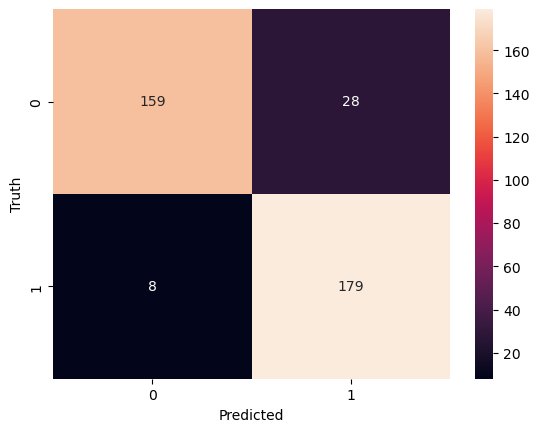

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       187
           1       0.86      0.96      0.91       187

    accuracy                           0.90       374
   macro avg       0.91      0.90      0.90       374
weighted avg       0.91      0.90      0.90       374



In [33]:
rewiews = [
    'I HAVE A DATE ON SUNDAY WITH WILL!!',
    'Free entry in 2 a wkly comp to win FA Cup fina.',
    "Thanks for your subscription to Ringtone UK your mobile will be charged еЈ5/month Please confirm by replying YES or NO. If you reply NO you will not be charged",
    "Yup... Ok i go home look at the timings then i msg М_ again... Xuhui going to learn on 2nd may too but her lesson is at 8am,"
]

model.predict(rewiews)

1/1 [==============================] - 1s 817ms/step


array([[0.09897184],
       [0.1412199 ],
       [0.8443667 ],
       [0.5061546 ]], dtype=float32)

In [34]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
